# Neural Network

colab에서 열기: https://colab.research.google.com/github/SLCFLAB/Fintech2022/blob/main/ML_day8.ipynb

## Tensor

In [2]:
import torch #pytorch: 머신러닝 라이브러리

In [8]:
#tensor: 배열의 집합
# x = torch.Tensor(행, 열)
x = torch.Tensor(2, 3)
print(x)

tensor([[1.7156e-07, 1.7662e-04, 2.5643e-09],
        [2.1456e-07, 1.7474e-04, 1.3662e-05]])


In [10]:
a = torch.zeros(2, 3)#0으로 채워진 Tensor 선언
b = torch.ones(2, 3)#1로 채워진 Tensor 선언
c = torch.rand(2, 3)#0, 1 사이의 랜덤 숫자로 채워진 Tensor 선언
d = torch.randn(2, 3)#평균이 0이고 분산이 1을 따르는 정규분포에서 추출된 값으로 채워진 Tensor 선언
e = torch.eye(2, 3)#정방행렬과 같은 Tensor 선언
f = torch.arange(0, 2, step=0.5)#0부터 2까지 0.5씩 증가하는 Tensor 선언
g = torch.Tensor([[1,2,3],[1,2,3]])#직접 값을 입력하여 선언
print(a)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


numpy와 비슷한 문법을 사용함.

## 신경망과 퍼셉트론

퍼셉트론: 다수의 신호를 받아 하나의 신호를 출력
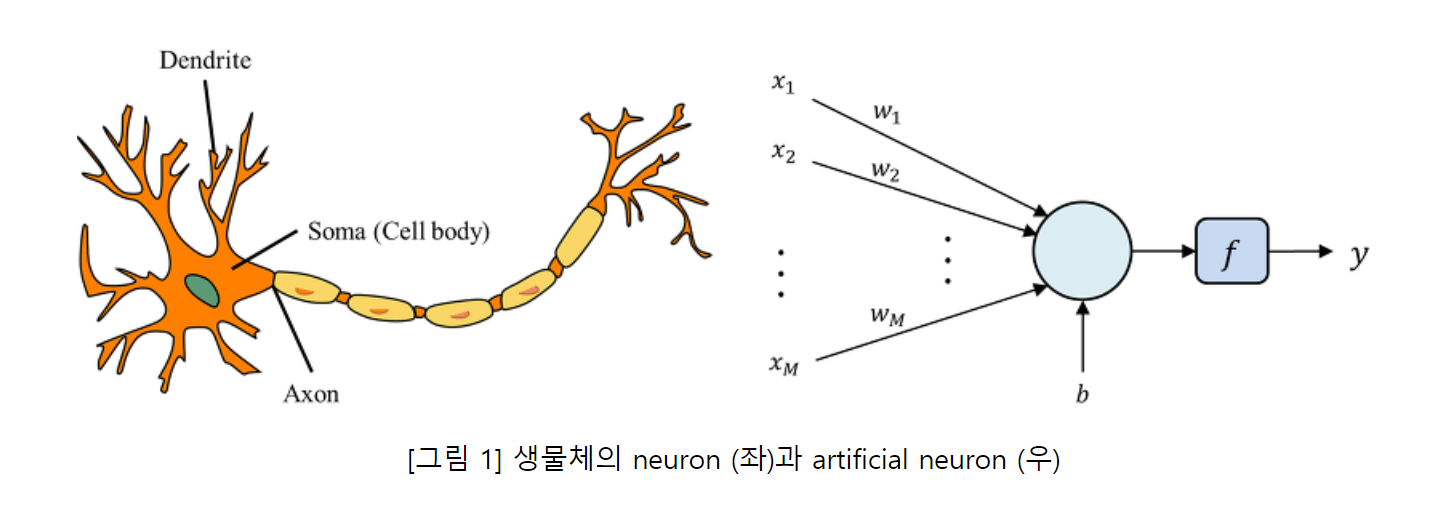
(그림 출처: https://smartstuartkim.wordpress.com/2019/01/27/history-of-neural-networks-1-perceptron/)

목표: 역전파를 활용해 좋은 가중치를 찾아내자!
- 순전파: 데이터를 이용해 손실함수를 계산한다
- 역전파: 기울기를 계산해 개선방향으로 가중치를 개선한다

### Linear regression

loss function 과 back propergation

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1) #reshape

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


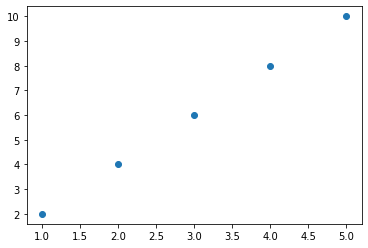

In [16]:
plt.scatter(x.numpy(), y.numpy()) #tensor를 바로 scatter 할 수 없기 때문에 numpy로 바꿔줘야 함.
plt.show()

In [22]:
w = torch.rand(1,1)
w.item()

0.0579683780670166

In [23]:
w*x

tensor([[0.0580],
        [0.1159],
        [0.1739],
        [0.2319],
        [0.2898]])

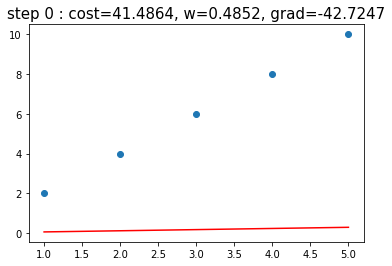

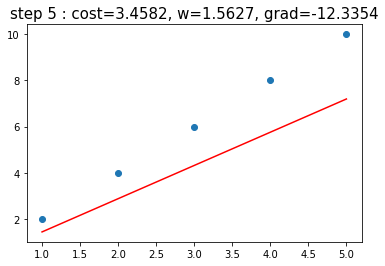

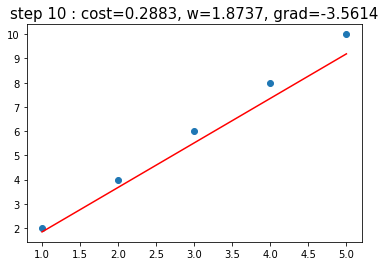

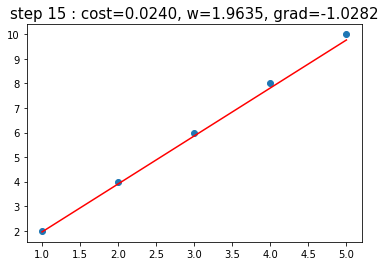

In [24]:
lr = 0.01

for step in range(20):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [25]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.919034957885742

### Activation function

신경망의 구성
- 입력층
- 은닉층
- 출력층

선형 신경망을 쌓을 경우 여러개를 쌓아도 선형 함수가 나오기 때문에 의미가 없음. 
따라서, "활성화 함수"를 추가시켜줌.
- 많이 사용되는 활성화 함수: ReLU, sigmoid, softmax(classification)